Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': None, 'n_estimators': 200}

Confusion Matrix:
 [[3403    0]
 [  69  104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.60      0.75       173

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576



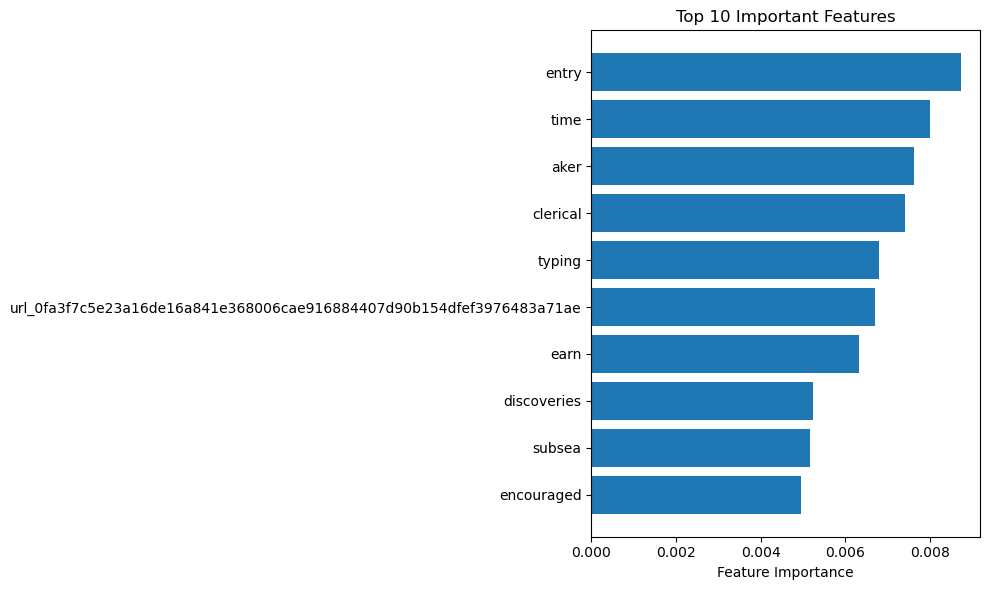

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

# Load preprocessed data (assumes it's been cleaned already)
data_path = os.path.join("Resources", "fake_job_postings.csv")
df = pd.read_csv(data_path)

# Combine relevant text fields into one
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df['text'] = df[text_columns].fillna('').agg(' '.join, axis=1)

# Define features and target
X = df['text']
y = df['fraudulent']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# GridSearchCV for model optimization
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_vec, y_train)

# Save optimization results to CSV
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['params', 'mean_test_score', 'std_test_score']]
results_df.to_csv("model_optimization_results.csv", index=False)

# Use best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vec)

# Evaluate best model
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Feature importances
importances = best_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_indices = importances.argsort()[-10:][::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [2]:
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'text'],
      dtype='object')


In [13]:
#here
# running model on second data set
new_data = pd.read_csv('../proj4/postings.csv') #Due to file size limitations postings.csv is kept outside git repo
new_data.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [5]:
print(new_data.columns)

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')


,title,description
0,Marketing Coordinator,Job descriptionA leading real estate firm in N...
1,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ..."
2,Assitant Restaurant Manager,The National Exemplar is accepting application...
3,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...
4,Service Technician,Looking for HVAC service tech with experience ...
...,...,...
123844,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...
123845,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...
123846,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...
123847,Business Development Manager,The Business Development Manager is a 'hunter'...


In [20]:


relevent_col = ['title', 'description']
new_data['text'] = new_data[relevent_col].fillna('').agg(' '.join, axis=1)
X_data_24 = vectorizer.transform(new_data['text'])



y_pred_24 = best_model.predict(X_data_24)
print(y_pred_24)

[0 0 0 ... 0 0 0]


In [24]:
counter_16 = 0

for i in df['fraudulent']:
    if i == 1:
        counter_16 += 1

len_of_data_16 = len(df)

In [25]:
counter = 0

for i in y_pred_24:
    if i == 1:
        counter += 1

len_of_data = len(y_pred_24)
print('-' * 20 + '2024 Data' + '-' *20)
print(f'Fraudulent: {counter}, Real: {len_of_data - counter}, Percent Fraud: {(counter/len_of_data) * 100}')
print('-' * 20 + '2016 Data' + '-' *20)
print(f'Fraudulent: {counter_16}, Real: {len_of_data_16 - counter_16}, Percent Fraud: {(counter_16/len_of_data_16) * 100}' )


--------------------2024 Data--------------------
Fraudulent: 8, Real: 123841, Percent Fraud: 0.006459478881541232
--------------------2016 Data--------------------
Fraudulent: 866, Real: 17014, Percent Fraud: 4.8434004474272925


In [26]:
del new_data